In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

# Get blobs data from sklearn.datasets

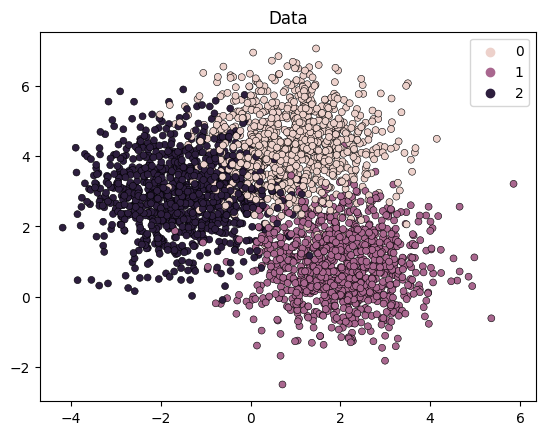

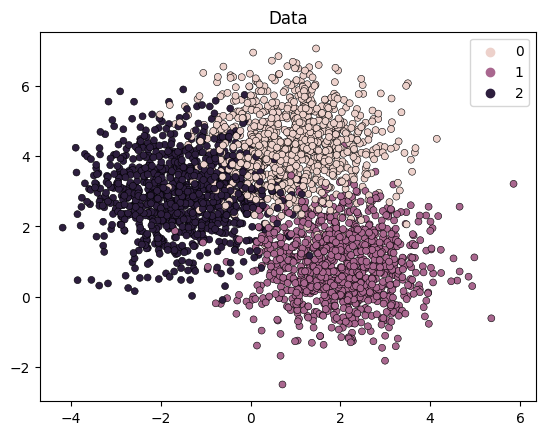

In [3]:
# @title Get data blobs
points, labels = make_blobs(n_samples=3000, n_features=2, shuffle=True,  random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()
points, labels = make_blobs(n_samples=3000, n_features=2 , shuffle=True,  random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()

# MLP class 

In [4]:
class MLP(nn.Module):
  def __init__(self, input_dim, layers_dim = [2,3,1], activations = [nn.ReLU(), nn.ReLU()]):
      super().__init__()
      # self.layers  = nn.Sequential(
      #     nn.Linear(nin, nouts),
      #     nn.ReLU(),
      #     nn.Linear(nin, nouts),
      #     nn.ReLU(),
      #     nn.Linear(nin, nouts)
      # )
      self.layers = nn.Sequential()

      layers_dim.insert(0, input_dim)
      n_layers = len(layers_dim)

      torch.manual_seed(2)
      for i in range(1, n_layers):
        self.layers.append(nn.Linear(layers_dim[i-1], layers_dim[i] ))
        if i <= len(activations):
          self.layers.append(activations[i-1])

  def forward(self, x):
    return self.layers(x)

# Custom data frame

In [5]:
class CustomDataFrame(nn.Module):
  def __init__(self, features, target ):
      self.target = torch.Tensor(target).to(dtype=torch.float32).flatten()
      self.features = torch.Tensor(features).to(dtype=torch.float32)

  def __len__(self):
    return len(self.target)

  def __getitem__(self, index):
    target_val = self.target[index]
    features_val = self.features[index]
    return  features_val, target_val

# Test 

In [6]:
model = MLP(2, layers_dim = [5,10,20,10,5,3], activations = [nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()])
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=5, bias=True)
    (9): ReLU()
    (10): Linear(in_features=5, out_features=3, bias=True)
  )
)


Use cross-entropy loss as I have a non-binary classification model. In my data set there is 0,1,2 - labels 

In [7]:
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [8]:
# split 80/20
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=0)

In [9]:
# split data set for train and test set
# it's preparation for the 3rd lab
X_train = torch.from_numpy(X_train).to(dtype=torch.float32)
X_test = torch.from_numpy(X_test).to(dtype=torch.float32)
y_train = torch.from_numpy(y_train).to(dtype=torch.long)
y_test = torch.from_numpy(y_test).to(dtype=torch.long)

In [10]:
train_df =  CustomDataFrame(X_train, y_train)
test_df =  CustomDataFrame(X_test, y_test)
train_data_loader = DataLoader(train_df, batch_size = 100 )
test_data_loader = DataLoader(test_df, batch_size = 100)

In [11]:
n_epochs = 100
epoch_loss = []


for epoch in range(n_epochs):
  total_loss = 0.0

  for i, data in enumerate(train_data_loader, 0):
      X, y = data
      X,y = X.float(), y.long()
     # print(X.shape, y.shape)

      optimizer.zero_grad()

      y_pred = model(X)#.softmax(dim = 1)

      loss = loss_fun(y_pred, y)

      loss.backward()
      optimizer.step()
      
  epoch_loss.append(loss.item())
  print(f'Epoch: {epoch}, loss : {epoch_loss[epoch]}')

Epoch: 0, loss : 1.1096282005310059
Epoch: 1, loss : 1.1005703210830688
Epoch: 2, loss : 1.081997036933899
Epoch: 3, loss : 1.03574800491333
Epoch: 4, loss : 0.9291266798973083
Epoch: 5, loss : 0.7706753015518188
Epoch: 6, loss : 0.6435126662254333
Epoch: 7, loss : 0.5650239586830139
Epoch: 8, loss : 0.50543612241745
Epoch: 9, loss : 0.4378112852573395
Epoch: 10, loss : 0.3671359717845917
Epoch: 11, loss : 0.31276726722717285
Epoch: 12, loss : 0.27474913001060486
Epoch: 13, loss : 0.2519189715385437
Epoch: 14, loss : 0.2354581505060196
Epoch: 15, loss : 0.22423523664474487
Epoch: 16, loss : 0.2153751403093338
Epoch: 17, loss : 0.2092757374048233
Epoch: 18, loss : 0.20435450971126556
Epoch: 19, loss : 0.1994105577468872
Epoch: 20, loss : 0.1953725814819336
Epoch: 21, loss : 0.19251230359077454
Epoch: 22, loss : 0.1902751326560974
Epoch: 23, loss : 0.18836459517478943
Epoch: 24, loss : 0.1866767853498459
Epoch: 25, loss : 0.18547996878623962
Epoch: 26, loss : 0.18439975380897522
Epoch: 2

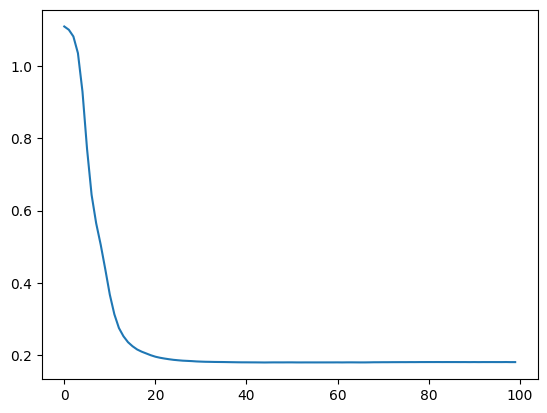

In [12]:
plt.plot(epoch_loss)
plt.show()